### DenseNet

![img1.daumcdn.png](https://i.ytimg.com/vi/y81RrUHMRSA/maxresdefault.jpg)

- ResNet 과 유사
- 모든 레이어의 Input 값을 output 에 Concat 한다.
- 또한 BottleNeck Layer 가 존재, Transition Layer로 다운 샘플링
- 이점 : ResNet 과 비슷한 성능을 내면서 연산 에서의 효율성,
<br>즉 Vanishing Gradient 개선, 파라미터 절약, 피쳐의 재 사용, 피쳐 강화

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

2024-11-01 16:40:19.987989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730446820.007107    8745 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730446820.013036    8745 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-01 16:40:20.030412: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# DenseNet121 모델 로드 (ImageNet 데이터셋에 대해 사전 학습된 가중치 사용)
model = DenseNet121(weights='imagenet')

I0000 00:00:1730446829.378725    8745 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9075 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:07:00.0, compute capability: 8.6


33188688/33188688 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# 이미지 로드, 전처리
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [4]:
# 이미지 입력, 분류
def classify_image(img_path):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)
    print('Predicted:', decode_predictions(preds, top=3)[0])
    return decode_predictions(preds, top=3)[0]

In [6]:
img_path = "../../data/img_fish.png"

In [7]:
# 이미지 분류
results = classify_image(img_path)

I0000 00:00:1730446988.142537    8815 service.cc:148] XLA service 0x7ff37c086830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730446988.142861    8815 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-01 16:43:08.340994: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730446989.489308    8815 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
Predicted: [('n01443537', 'goldfish', np.float32(0.99872714)), ('n02606052', 'rock_beauty', np.float32(0.0004863688)), ('n01440764', 'tench', np.float32(0.0003897743))]


I0000 00:00:1730447002.329533    8815 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


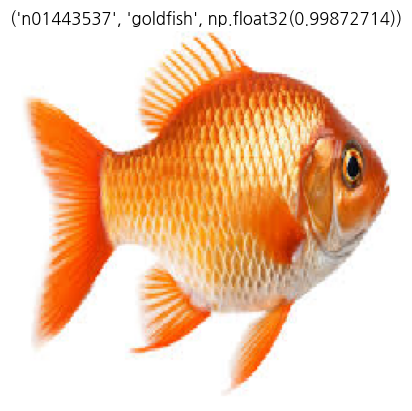

In [11]:
# 이미지, 분류 결과 시각화
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title(f'{results[0]}')
plt.show()
